In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
df = pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [3]:
from svm_margin_plot import plot_svm_boundary
# bizim dosyamızda oluşturduğumuz kendi çizdirim kütüphanemiz

In [4]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [5]:
from sklearn.svm import SVC

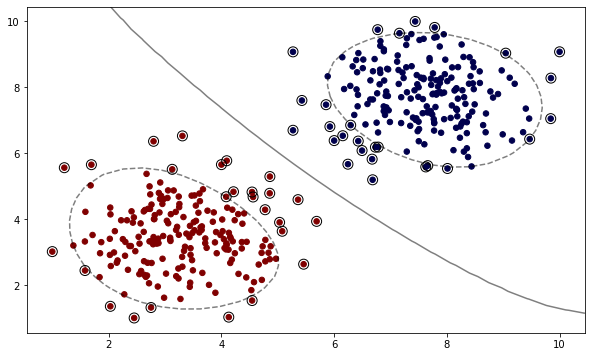

In [6]:
model = SVC(C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X,y);
# 0.1 c değeri ile gösterimi
# support sayıları fazla. support değerleri yuvarlak içine alınmış noktalardır.

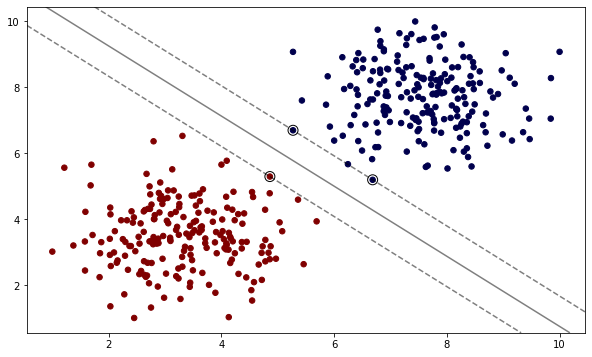

In [7]:
model = SVC(kernel='linear', C=4)
model.fit(X, y)
plot_svm_boundary(model, X,y);
# C parametresi arttıkça support değerlerin sayısı da azalmaktadır.

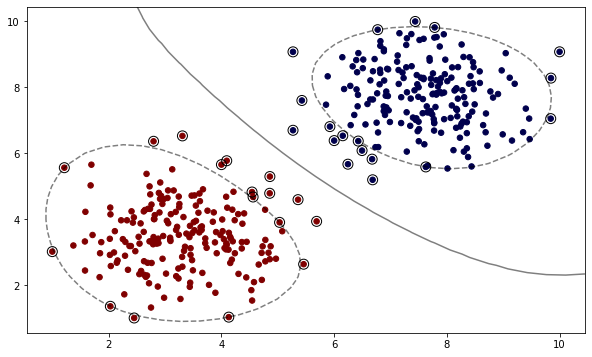

In [8]:
model = SVC(kernel="rbf", C=0.2, gamma=0.1)
model.fit(X, y)
plot_svm_boundary(model, X,y);
# marjin sınırı çember daha küçük.

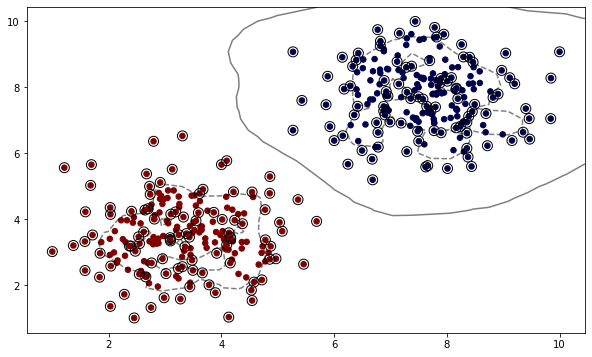

In [9]:
model = SVC(kernel="rbf", C=0.2, gamma=2)
model.fit(X, y)
plot_svm_boundary(model, X,y);
# gamma değeri arttıkça marjin sınırı da artıyor. alanı oldukça daraltmaktadır.

In [ ]:
# özetle C değeri ve gamma değeri arttıkça overfiting durumu artar. o halde grid search ile en iyi gamma ve c skorlarını almak
# gerekmektedir.

### Not pipline Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".
#### Biz en iyi gamma değerlerini, kernel değerini ve C değerlerini GridSearchCV ile belirleyeceğiz.

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
svm = SVC()
# İLK ÖNCE default ile modeli sıfırlayalım.

In [13]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [14]:
param_grid = {'C':[0.01,0.1,1,5,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2,3]}

In [15]:
svm_grid = GridSearchCV(svm, param_grid)

In [16]:
svm_grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 1000], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [18]:
y_pred = svm_grid.predict(X)

In [19]:
print(confusion_matrix(y,y_pred))
print(classification_report(y, y_pred))

[[200   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [20]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [21]:
# kadın şeker hastaların hamilelik, kan değerleri, insulin değerleri, vucud index değerleri vb.. durumlara göre hastalık durumu
# 1 hasta, 0 sağlıklı.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df["Outcome"].value_counts()
# sağlıklı 500, hasta 268.

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
df.corr()["Outcome"].drop("Outcome").sort_values()

BloodPressure              0.065
SkinThickness              0.075
Insulin                    0.131
DiabetesPedigreeFunction   0.174
Pregnancies                0.222
Age                        0.238
BMI                        0.293
Glucose                    0.467
Name: Outcome, dtype: float64

### Train test split : 

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(columns= "Outcome", axis=1)
y = df["Outcome"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

### Modell ve Model performans metricleri : 

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Scale etmeden skorları alalım : 

In [31]:
svm_model = SVC(random_state = 42)

In [32]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[88 12]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154


Train_Set
[[368  32]
 [104 110]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       400
           1       0.77      0.51      0.62       214

    accuracy                           0.78       614
   macro avg       0.78      0.72      0.73       614
weighted avg       0.78      0.78      0.77       614



#### Cross validate ile scale etmeden skorları kontrol edelim : 

In [34]:
from sklearn.model_selection import cross_validate

In [35]:
model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# test değerlerimizi karşılaştırınca arada 

test_accuracy    0.762
test_precision   0.739
test_recall      0.481
test_f1          0.579
dtype: float64

## Scale ile yazalım : (pipline)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
# scale ile değerler daha güzel bir hal aldı.

Test_Set
[[83 17]
 [21 33]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Train_Set
[[371  29]
 [ 72 142]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       400
           1       0.83      0.66      0.74       214

    accuracy                           0.84       614
   macro avg       0.83      0.80      0.81       614
weighted avg       0.84      0.84      0.83       614



#### Cross validate ile kontrol edelim : 

In [39]:
# modeli sıfırlamayı unutmayalım.
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# skorlar arasında denge var.

test_accuracy    0.775
test_precision   0.718
test_recall      0.598
test_f1          0.646
dtype: float64

### GridSearchCV ile en iyi SVM parametrelerini bulalım : 

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': 42,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [47]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1,0.2,0.3,0.5,1,2,3,4,5],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear',"poly"],
             "SVC__degree":[1,2,3]}
# pipe model formatın da nasıl yazılıyorsa o şeklide yazmak gerekmektedir.

In [48]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)
# probability=True roc_auc skorunu almak için yapmamız gerekmektedir.
# class_weighted burda verdik, data dengesiz çünkü

In [49]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 2,
                                    3, 4, 5],
                         'SVC__degree': [1, 2, 3],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear', 'poly']},
             scoring='recall')

In [53]:
svm_model_grid.best_params_

{'SVC__C': 0.05, 'SVC__degree': 1, 'SVC__gamma': 0.3, 'SVC__kernel': 'rbf'}

In [54]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44 56]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.88      0.44      0.59       100
           1       0.46      0.89      0.61        54

    accuracy                           0.60       154
   macro avg       0.67      0.66      0.60       154
weighted avg       0.73      0.60      0.59       154



In [55]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[44 56]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.88      0.44      0.59       100
           1       0.46      0.89      0.61        54

    accuracy                           0.60       154
   macro avg       0.67      0.66      0.60       154
weighted avg       0.73      0.60      0.59       154


Train_Set
[[208 192]
 [ 19 195]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       400
           1       0.50      0.91      0.65       214

    accuracy                           0.66       614
   macro avg       0.71      0.72      0.66       614
weighted avg       0.77      0.66      0.66       614



### Modelin Genel Performansı : 

In [56]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

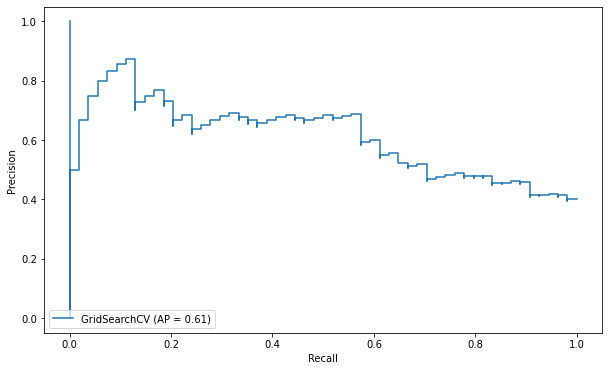

In [57]:
plot_precision_recall_curve(svm_model_grid, X_test, y_test);
# precision_recall çizebilmemiz için operations içine probability=True diye tanımlamam lazım. bu şekilde tanımladığım modelin
# precision_recall grafiğini görebilirim. çünkü 1 olup 1 olarak doğru girme, 1 olup 0 olarak yanlış bilme ve 0 olup 1 olarak 
# yanlış bilme olasılık değerlerini görmem için.

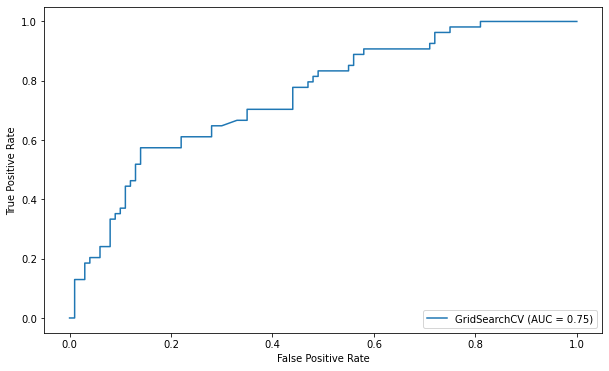

In [58]:
plot_roc_curve(svm_model_grid, X_test, y_test);
# 1 leri tespit etme başarım.

### En iyi Threshold değeri almak : SVM de best threshold alınması tavsiye edilmez. sadece GridSearchCV kullanılır. sadece ders olduğu için yapıldı.

In [59]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)
# hiçbirşekilde parametre vermeyin aksi halde hatalı en iyi threshold değeri alabiliriz.
# çizebilmesi için probability=True diyeceğiz.

In [60]:
svc_basic_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(probability=True, random_state=42))])

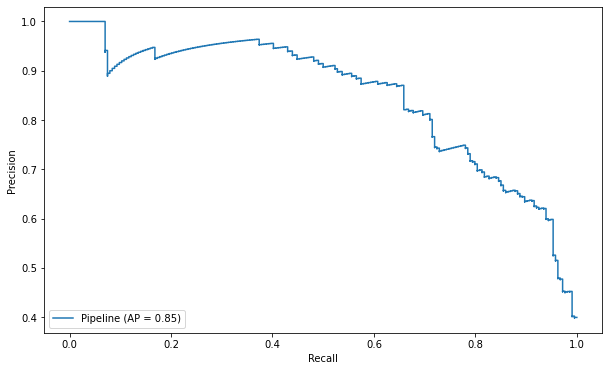

In [61]:
plot_precision_recall_curve(svc_basic_model, X_train, y_train);
# sol üst köşeye en yakın threshold değeri.

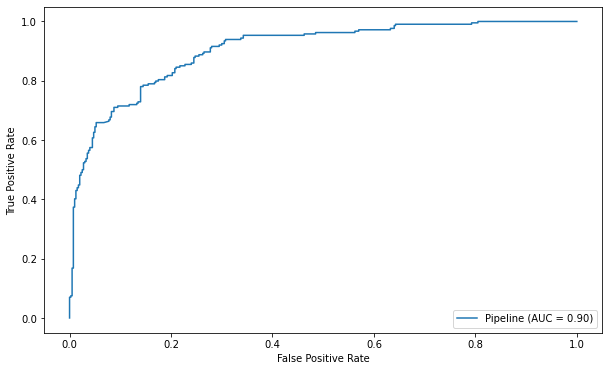

In [62]:
plot_roc_curve(svc_basic_model, X_train, y_train);

##### recall skoru için best threshold değeri  : 

In [70]:
y_pred_proba = svc_basic_model.predict_proba(X_train) # olasılık değerlerini bulacağız.
roc_auc_score(y_train, y_pred_proba[:,1]) # 1 leri train seti için tahmin etme olasılığı.

0.9048014018691589

In [71]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
# fp_rate = gerçek 0 lara yanlış 1 olarak bildiğimiz değerler.
# tp_rate = gerçek 1 leri doğru 1 olarak bildiğimiz değerler.
# threshold = bizim 0 ve 1 arasında olasılık değerlerimiz.
optimal_idx = np.argmax(tp_rate - fp_rate) 
# tp_rate - fp_rate değerinin en fazla olduğu indexi bulur. yani en iyi threshold değerinin bulunduğu index.
optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
print(f"recall skorumuz için en iyi threshold değerimiz = {optimal_threshold}") # en iyi threshold değeri.

recall skorumuz için en iyi threshold değerimiz = 0.38191194012838514


##### F1 skoru için en iyi threshol değeri : 

In [72]:
y_pred_proba_f1 = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba_f1[:,1])
precisions_f1, recalls_f1, thresholds_f1 = precision_recall_curve(y_train, y_pred_proba[:,1])
optimal_idx_f1 = np.argmax((2 * precisions_f1 * recalls_f1) / (precisions_f1 + recalls_f1))
optimal_threshold_f1 = thresholds_f1[optimal_idx_f1]
print("f1 skorumuz için en iyi threshold değerimiz = ", optimal_threshold_f1)

f1 skorumuz için en iyi threshold değerimiz =  0.38191194012838514


In [73]:
y_pred_recall = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_test,y_pred_recall))
print(classification_report(y_test,y_pred_recall))
# bu sefer en iyi parametrelerimiz olan gridsearchcv ile elde ettiğimiz modelimiz ile best threshold recall skoruna bakalım.

[[52 48]
 [11 43]]
              precision    recall  f1-score   support

           0       0.83      0.52      0.64       100
           1       0.47      0.80      0.59        54

    accuracy                           0.62       154
   macro avg       0.65      0.66      0.62       154
weighted avg       0.70      0.62      0.62       154



In [74]:
y_pred_f1 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold_f1 else 0)
print(confusion_matrix(y_test,y_pred_f1))
print(classification_report(y_test,y_pred_f1))

[[52 48]
 [11 43]]
              precision    recall  f1-score   support

           0       0.83      0.52      0.64       100
           1       0.47      0.80      0.59        54

    accuracy                           0.62       154
   macro avg       0.65      0.66      0.62       154
weighted avg       0.70      0.62      0.62       154



### Final_Tahmin : 

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [77]:
svm_model_grid.best_params_

{'SVC__C': 0.05, 'SVC__degree': 1, 'SVC__gamma': 0.3, 'SVC__kernel': 'rbf'}

In [78]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced",random_state=42, degree=1))]
model = Pipeline(steps=operations)
CV(10, model, X_train, y_train, optimal_threshold)
# en iyi recall threshold değeri ile aldığımız skor.

Accuracy      72.00%  std 5.68%
Precision-1   57.08%  std 5.78%
Recall-1      81.36%  std 8.67%
F1_score-1    66.95%  std 6.41%


In [79]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced",random_state=42, degree=1))]
model = Pipeline(steps=operations)
CV(10, model, X_train, y_train, optimal_threshold_f1)
# en iyi f1 skoru ile aldığımız threshold değeri

Accuracy      72.00%  std 5.68%
Precision-1   57.08%  std 5.78%
Recall-1      81.36%  std 8.67%
F1_score-1    66.95%  std 6.41%
